In [10]:
import os
os.environ['DEBUG'] = '1'

%rm demo/*.pth

import torch


from PIL import Image
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import sys
import os.path
import matplotlib.pyplot as plt


config_file = './configs/adamixer/adamixer_r50_1x_coco.py'
# path to checkpoint or simply `None` for random initialized
checkpoint_file = None

model = init_detector(config_file, checkpoint_file, device='cuda:0')

for m in model.modules():
    if hasattr(m, '_DEBUG'):
        setattr(type(m), '_DEBUG', 0)

IMG = 'data/coco/val2017/000000057597.jpg'
IMG_IND = IMG[-16:-4]

Image.open(IMG).save('demo/testin.jpg')
result = inference_detector(model, IMG)
show_result_pyplot(model, IMG, result, score_thr=0.3,
                   out_file='demo/result.jpg')


Use load_from_local loader


/home/gaoziteng/local_workspace/adamixer-github/AdaMixer/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


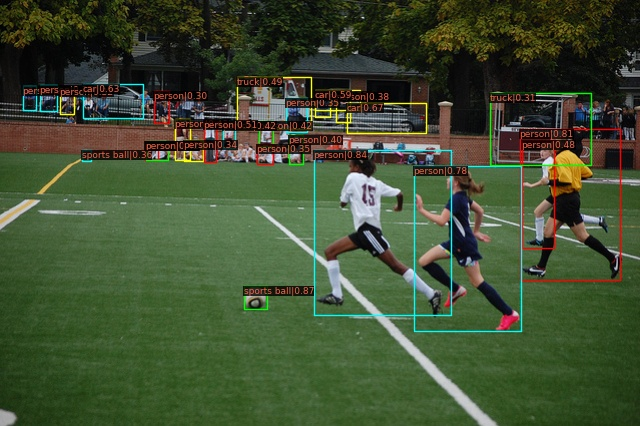

In [11]:
Image.open('demo/result.jpg')

In [12]:
scores = torch.load('demo/bbox_results_5.pth', map_location='cpu')['cls_score']
category = 0
scores[0, :, category].sigmoid().topk(5)

torch.return_types.topk(
values=tensor([0.8366, 0.8110, 0.7830, 0.5122, 0.4761]),
indices=tensor([80,  6, 99, 90, 15]))

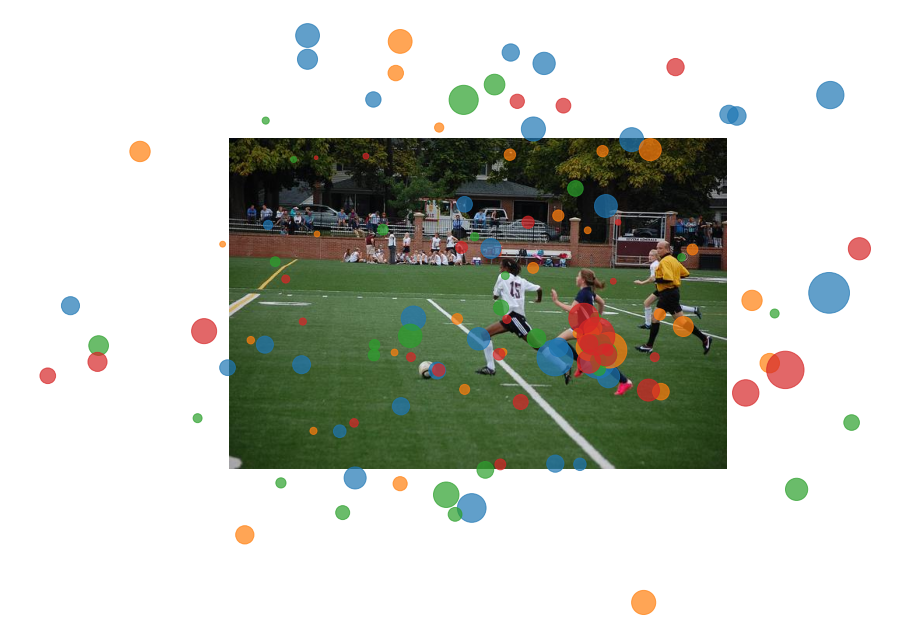

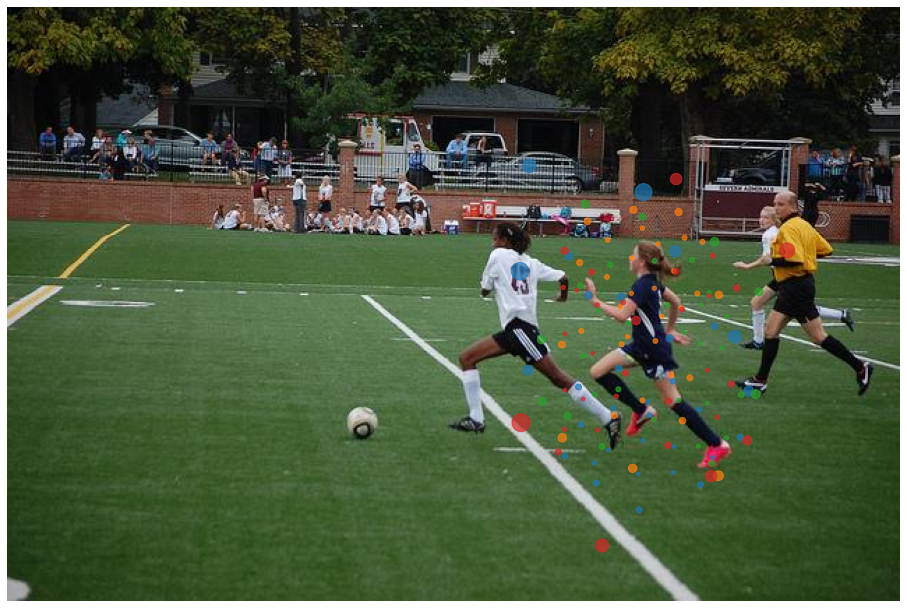

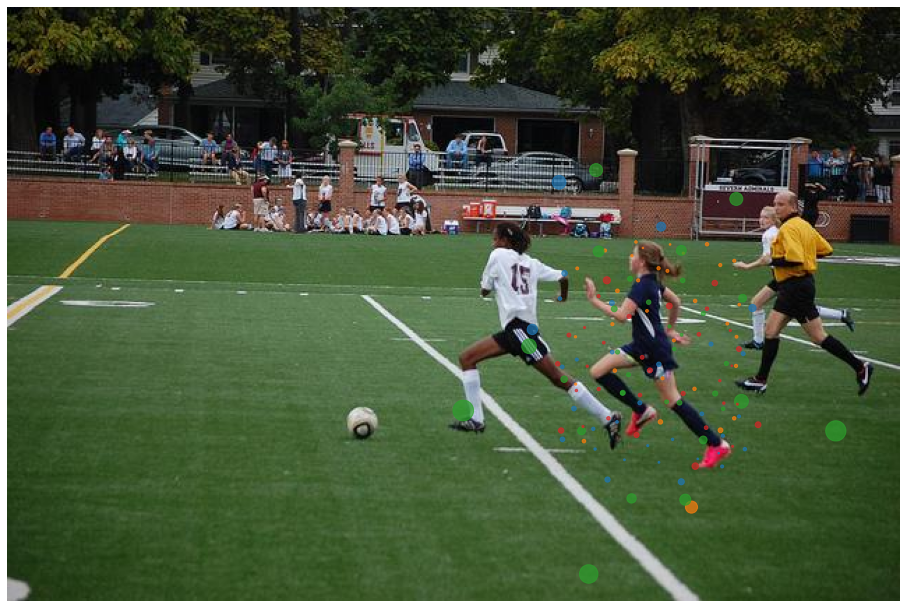

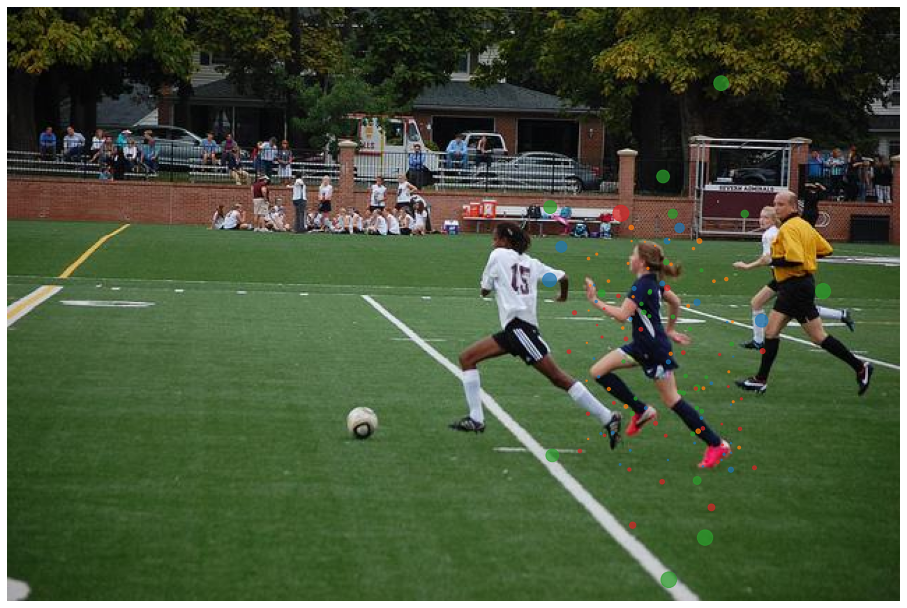

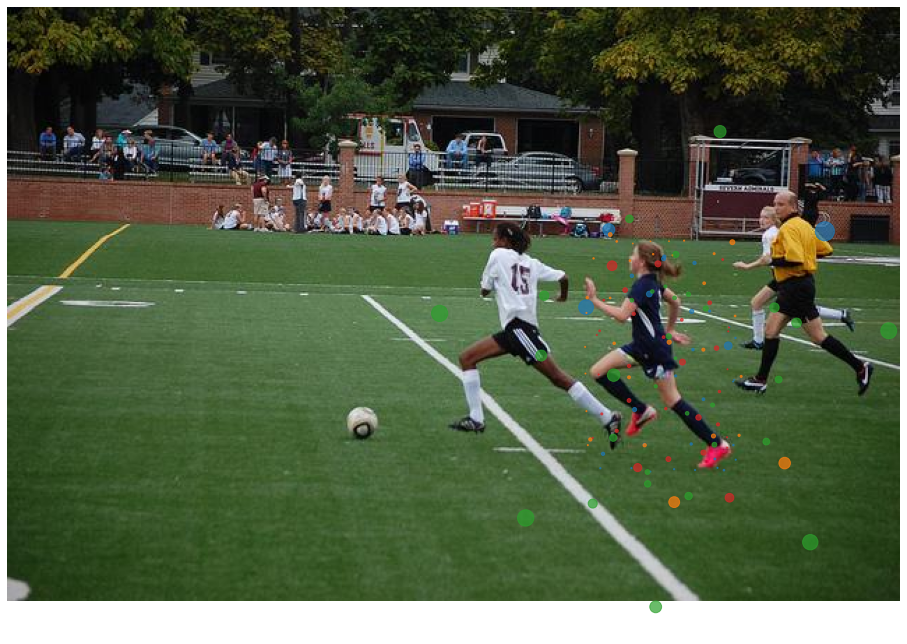

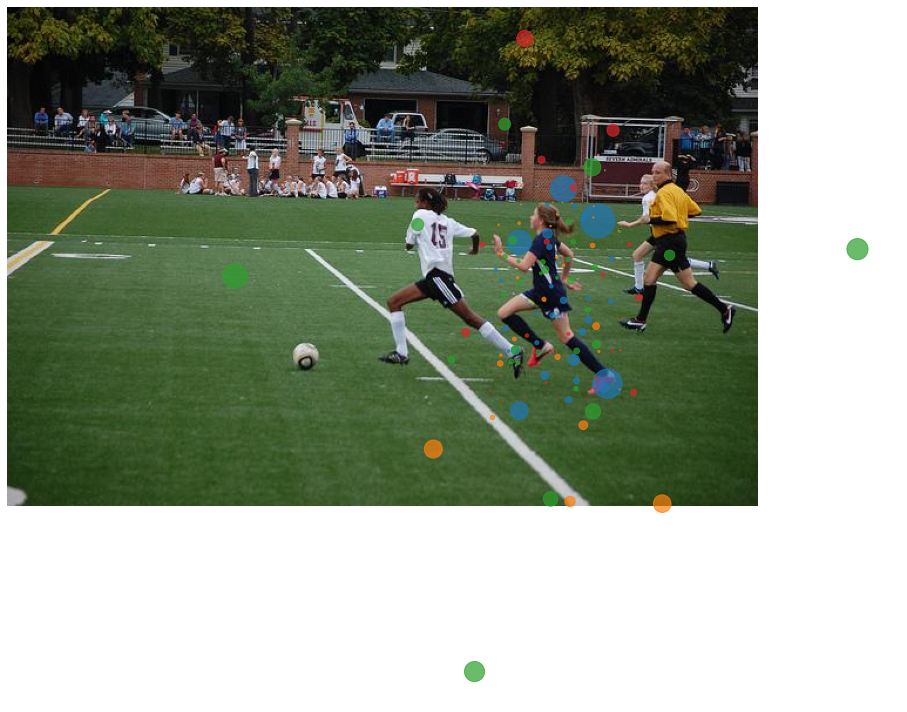

In [15]:
for STAGE in range(6):
    P = torch.load('demo/sample_xy_{}.pth'.format(STAGE), map_location='cpu').detach()
    metas = torch.load('demo/img_metas.pth', map_location='cpu')

    sf = metas[0]['scale_factor']

    xy = P[0, 99, 0] 

    plt.figure(figsize=(16, 16))
    plt.imshow(Image.open('demo/testin.jpg'))
    xy = xy.view(4, -1, 3)
    for i in range(4):
        sub_xy = xy[i]
        plt.scatter(sub_xy[:, 0]/ sf[0], sub_xy[:, 1]/ sf[0], s=4.0 ** (sub_xy[:, 2]-4), alpha=0.7)
    plt.axis('off')
    plt.savefig('sampling-points_image-{}_stage-{}.jpg'.format(IMG_IND, STAGE), bbox_inches='tight', pad_inches=0)
    plt.show()
    